In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization,Activation, Conv2D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('student-mat.csv')
print(df.shape)
print(df.columns)

(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [57]:
df = df.drop(['famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
             'nursery', 'higher', 'internet', 'romantic', 'Medu', 'Fedu',
              'absences', 'health', 'Walc', 'Dalc', 'G1', 'G2', 'G3'], axis = 1)
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['school'] = LabelEncoder().fit_transform(df['school'])
df['address'] = LabelEncoder().fit_transform(df['address'])
df['schoolsup'] = LabelEncoder().fit_transform(df['schoolsup'])
df['famsup'] = LabelEncoder().fit_transform(df['famsup'])
df['paid'] = LabelEncoder().fit_transform(df['paid'])
df['activities'] = LabelEncoder().fit_transform(df['activities'])
df.head()

,school,sex,age,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,famrel,freetime,goout
0,0,0,18,1,2,2,0,1,0,0,0,4,3,4
1,0,0,17,1,1,2,0,0,1,0,0,5,3,3
2,0,0,15,1,1,2,3,1,0,1,0,4,3,2
3,0,0,15,1,1,3,0,0,1,1,1,3,2,2
4,0,0,16,1,1,2,0,0,1,1,0,4,3,2


In [58]:
scaler = StandardScaler()
scaler.fit(df.drop('sex', axis=1))
scaled_features = pd.DataFrame(scaler.transform(df.drop('sex', axis=1)),columns=df.columns[:-1])
scaled_features.head()

,school,sex,age,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,famrel,freetime
0,-0.36305,1.023046,0.535392,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.062194,-0.236010,0.801479
1,-0.36305,0.238380,0.535392,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,1.178860,-0.236010,-0.097908
2,-0.36305,-1.330954,0.535392,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.062194,-0.236010,-0.997295
3,-0.36305,-1.330954,0.535392,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,-1.054472,-1.238419,-0.997295
4,-0.36305,-0.546287,0.535392,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.062194,-0.236010,-0.997295


In [59]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['sex'], random_state=0)

In [98]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

In [100]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 1s 4ms/step - loss: 0.7011 - accuracy: 0.5405
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5574
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5709
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.5878
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.5811
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6014
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.6284
Epoch 8/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.6486
Epoch 9/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6689
Epoch 10/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6286 - accuracy: 0.6655
Epoch 11/30
10/10 [

In [101]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[42 15]
 [13 29]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        57
           1       0.66      0.69      0.67        42

    accuracy                           0.72        99
   macro avg       0.71      0.71      0.71        99
weighted avg       0.72      0.72      0.72        99



In [102]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5512152910232544
Test accuracy: 0.7171717286109924


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

In [72]:
(train_features, train_labels), (test_features, test_labels) = cifar100.load_data()

169017344/169001437 [==============================] - 120s 1us/step


In [73]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [74]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
num_classes = 100
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

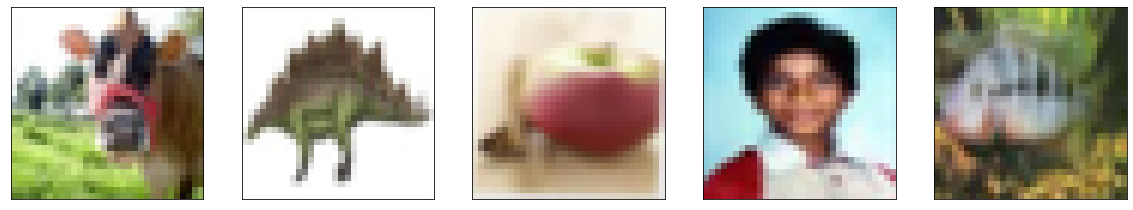

In [76]:
plt.figure(figsize=(20, 20))
for i in range(0, 5):
    
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [81]:
alpha = 0.02

model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(train_features.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(100, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [84]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]
model_history = model.fit(train_features, train_labels, validation_split=0.2, epochs=10, 
          batch_size=128, callbacks = my_callbacks)

Epoch 1/10
313/313 [==============================] - 160s 509ms/step - loss: 2.0393 - accuracy: 0.4583 - val_loss: 2.4781 - val_accuracy: 0.3696
Epoch 2/10
313/313 [==============================] - 159s 507ms/step - loss: 1.8175 - accuracy: 0.5063 - val_loss: 2.4669 - val_accuracy: 0.3828
Epoch 3/10
313/313 [==============================] - 157s 500ms/step - loss: 1.5967 - accuracy: 0.5583 - val_loss: 2.5546 - val_accuracy: 0.3848
Epoch 4/10
313/313 [==============================] - 157s 502ms/step - loss: 1.3874 - accuracy: 0.6110 - val_loss: 2.6202 - val_accuracy: 0.3847
Epoch 5/10
313/313 [==============================] - 157s 503ms/step - loss: 1.1791 - accuracy: 0.6617 - val_loss: 2.7810 - val_accuracy: 0.3771
Epoch 6/10
313/313 [==============================] - 157s 500ms/step - loss: 0.9917 - accuracy: 0.7065 - val_loss: 2.9781 - val_accuracy: 0.3818
Epoch 7/10
313/313 [==============================] - 156s 499ms/step - loss: 0.8109 - accuracy: 0.7601 - val_loss: 3.1670 -

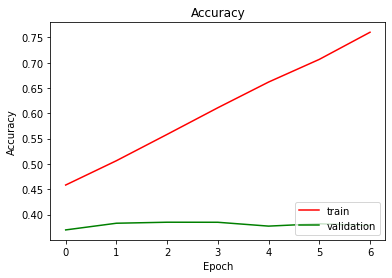

In [85]:
plt.plot(model_history.history['accuracy'],c='red')
plt.plot(model_history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

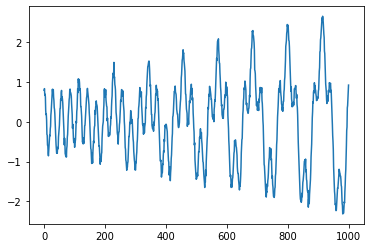

In [30]:
time_series_length = 1000
t = np.linspace(0, 55, time_series_length)
ts = t * np.cos(t) / 5 + 4 * np.cos(t*4) + 0.4 * np.random.standard_normal(size=time_series_length)
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(ts_norm)

In [32]:
train_size = int(len(ts) * 0.85)
test_size = len(ts) - train_size
train, test = ts_norm[0:train_size], ts_norm[train_size:len(ts)]

In [33]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        x.append(a)
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [34]:
n_time_steps = 15
n_inputs = 1

x_train, y_train = create_dataset(train, n_time_steps)
x_test, y_test = create_dataset(test, n_time_steps)

x_train = np.reshape(x_train, (x_train.shape[0], n_time_steps, n_inputs))
x_test = np.reshape(x_test, (x_test.shape[0], n_time_steps, n_inputs))

In [36]:
model = Sequential()
model.add(LSTM(150, input_shape=(n_time_steps, n_inputs), return_sequences=False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               91200     
                                                                 
 dense_9 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
27/27 - 4s - loss: 0.3451 - 4s/epoch - 142ms/step
Epoch 2/5
27/27 - 1s - loss: 0.0763 - 697ms/epoch - 26ms/step
Epoch 3/5
27/27 - 1s - loss: 0.0254 - 720ms/epoch - 27ms/step
Epoch 4/5
27/27 - 1s - loss: 0.0223 - 728ms/epoch - 27ms/step
Epoch 5/5
27/27 - 1s - loss: 0.0204 - 691ms/epoch - 26ms/step


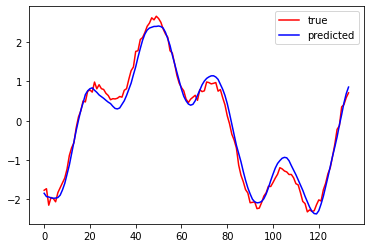

In [38]:
y_pred = model.predict(x_test)
plt.plot(y_test, 'r', label = 'true')
plt.plot(y_pred, 'b', label = 'predicted')
plt.legend()